---
title: "Digital Twins"
author: Grant and company
date: last-modified
engine: julia
julia:
    exeflags: ["--project=."]
toc: true
toc-depth: 4
toc-expand: 2
toc-title: Outline
toc-location: left
format:
    html:
        linkcolor: black
        theme: cosmo
        lightbox: true
        crossrefs-hover: true
        include-in-header: mathjax.html
        code-overflow: wrap
---

# Digital twins in Julia

In [12]:
ENV["jutuljudifilter_force_install"] = "true"
Base.active_project()

"/home/gbruer/a/curr_research/ensembles/JutulJUDIFilter.jl/examples/filter-comparison/Project.toml"

## Get things installed

In [16]:
include("scripts/install.jl")
include("scripts/generate_ground_truth.jl")
include("scripts/generate_initial_ensemble.jl")
include("scripts/run_estimator.jl")
using CairoMakie
using JutulJUDIFilter
ENV["jutuljudifilter_force_install"] = "false";

## Set params

In [7]:
params = include("params/tutorial-params.jl")
filestem = "tutorial"

"tutorial"

## Run ground-truth

In [8]:
params_gt = params.ground_truth
filestem = "tutorial-ground-truth"

params_file = datadir("ground_truth", "params", "$filestem.jld2")
wsave(params_file; params=params_gt)

params_file = datadir("ground_truth", "params", "$filestem-human.yaml")
YAML.write_file(params_file, to_dict(params_gt, YAMLStyle))

println(YAML.write(to_dict(params_gt, YAMLStyle)))

version: "v0.2"
transition:
  mesh:
    n: (75, 1, 75)
    d: (55, 100.0, 25)
    origin: (0.0, 0.0, 0.0)
  nt: 25
  system:
    viscosity_CO2: 0.0001
    viscosity_H2O: 0.001
    density_CO2: 501.9
    density_H2O: 1053.0
    reference_pressure: 1.5e7
    compressibility_CO2: 8.0e-9
    compressibility_H2O: 3.6563071e-10
    extra_kwargs: NamedTuple()
  dt: 73.0485
  nbatches: 1
  kv_over_kh: 0.36
  sat0_radius_cells: 4
  sat0_range: (0.2, 0.8)
  fluid1:
    name: "H₂O"
    viscosity: 0.001
    density: 1053.0
    compressibility: 3.6563071e-10
  fluid2:
    name: "CO₂"
    viscosity: 0.0001
    density: 776.6
    compressibility: 8.0e-9
  g: 9.81
  reference_pressure: 1.5e7
  porosity:
    name: field
    suboptions:
      value: 0.25
  permeability:
    name: field
    suboptions:
      file: "compass/broad&narrow_perm_models_new.jld2"
      idx: ~
      key: "K"
      scale: 9.86923266716013e-16
      resize: true
  permeability_v_over_h: 0.36
  temperature:
    name: field
    sub

In [9]:
savedir = datadir("ground_truth", "data")
data_gt, filepath = produce_or_load(
    generate_ground_truth,
    params_gt,
    savedir;
    filename=filestem,
    verbose=false,
    force=true,
)
states = data_gt["states"]
observations = data_gt["observations"]
observations_clean = data_gt["observations_clean"]
state_times = data_gt["state_times"]
observation_times = data_gt["observation_times"];

Ground-truth   0%|                                      |  ETA: N/A
Ground-truth   0%|                                      |  ETA: N/A


Noise norm: 1.0557323e11
SNR: 20.0


Building born operator
Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Building forward operator
Operator `forward` ran in 0.07 s
Building adjoint born operator
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.11 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.10 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.10 s
Operator `gradient` ran in 0.11 s
Ground-truth   0%|                                      |  ETA: N/A


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │ 10 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     48.0 │          4.8 │   48 (0) │
│ Linearization  │     58.0 │          5.8 │   58 (0) │
│ Linear solver  │    128.0 │         12.8 │  128 (0) │
│ Precond apply  │    256.0 │         25.6 │  256 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬──────────┬────────────┬────────╮
│ Timing type   │     Each │   Relative │  Total │
│               │       ms │ Percentage │      s │
├───────────────┼──────────┼────────────┼────────┤
│ Properties    │   0.5823 │     0.28 % │ 0.0279 │
│ Equations     │  40.7279 │    23.92 % │ 2.3622 │
│ Assembly      │  17.9839 │    10.56 % │ 1.0431 │
│ Linear solve  │  12.6302 │     6.14 % │ 0.6063 │
│ Linear setup  │  40.2951 │    19.59 % │ 1.9342 │
│ Precond apply │   2.7251 │     7.07

Operator `born` ran in 0.14 s
Operator `born` ran in 0.19 s
Operator `forward` ran in 0.11 s
Operator `gradient` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Ground-truth  33%|████████████▋                         |  ETA: 0:02:52


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │  6 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     24.0 │          4.0 │   24 (0) │
│ Linearization  │     30.0 │          5.0 │   30 (0) │
│ Linear solver  │     76.0 │      12.6667 │   76 (0) │
│ Precond apply  │    152.0 │      25.3333 │  152 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬─────────┬────────────┬──────────╮
│ Timing type   │    Each │   Relative │    Total │
│               │      ms │ Percentage │       ms │
├───────────────┼─────────┼────────────┼──────────┤
│ Properties    │  0.7060 │     3.91 % │  16.9440 │
│ Equations     │  2.2693 │    15.70 % │  68.0790 │
│ Assembly      │  0.7344 │     5.08 % │  22.0307 │
│ Linear solve  │  1.2640 │     6.99 % │  30.3369 │
│ Linear setup  │  7.3978 │    40.94 % │ 177.5460 │
│ Precond apply │  0.6441 │ 

Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Ground-truth  67%|█████████████████████████▍            |  ETA: 0:00:49


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │  6 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     21.0 │          3.5 │   21 (0) │
│ Linearization  │     27.0 │          4.5 │   27 (0) │
│ Linear solver  │     72.0 │         12.0 │   72 (0) │
│ Precond apply  │    144.0 │         24.0 │  144 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬─────────┬────────────┬──────────╮
│ Timing type   │    Each │   Relative │    Total │
│               │      ms │ Percentage │       ms │
├───────────────┼─────────┼────────────┼──────────┤
│ Properties    │  0.6879 │     3.86 % │  14.4468 │
│ Equations     │  2.7308 │    19.71 % │  73.7307 │
│ Assembly      │  0.7686 │     5.55 % │  20.7510 │
│ Linear solve  │  1.2883 │     7.23 % │  27.0533 │
│ Linear setup  │  6.1562 │    34.56 % │ 129.2802 │
│ Precond apply │  0.6146 │ 

Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Ground-truth 100%|██████████████████████████████████████| Time: 0:01:48


108.992503 seconds (79.45 M allocations: 6.111 GiB, 20.39% gc time, 49.33% compilation time: 12% of which was recompilation)
  ^ timing for making ground truth data


Ground-truth 100%|██████████████████████████████████████| Time: 0:01:48
┌ Warning: The Git repository
│ ('/home/gbruer/a/curr_research/ensembles/JutulJUDIFilter.jl/examples/filter-comparison')
│ is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /home/gbruer/.julia/packages/DrWatson/8XYbJ/src/saving_tools.jl:71


In [10]:
@show length(states)
@show length(state_times)
@show keys(states[1])
@show keys(observations[1])
@show length(observations)
@show length(observation_times);

length(states) = 4
length(state_times) = 4
keys(states[1]) = [:Permeability, :Injector_Pressure, :Saturation, :Pressure, :Facility_TotalSurfaceMassRate, :Injector_Saturations]
keys(observations[1]) = [:dshot, :rtm]
length(observations) = 4
length(observation_times) = 4


In [17]:
CairoMakie.activate!()
grid_2d = get_2d_plotting_mesh(params_gt.transition.mesh)

(d = (0.055, 0.025), origin = (0.0, 0.0), n = (75, 75))

size(data) = (3, 5625)


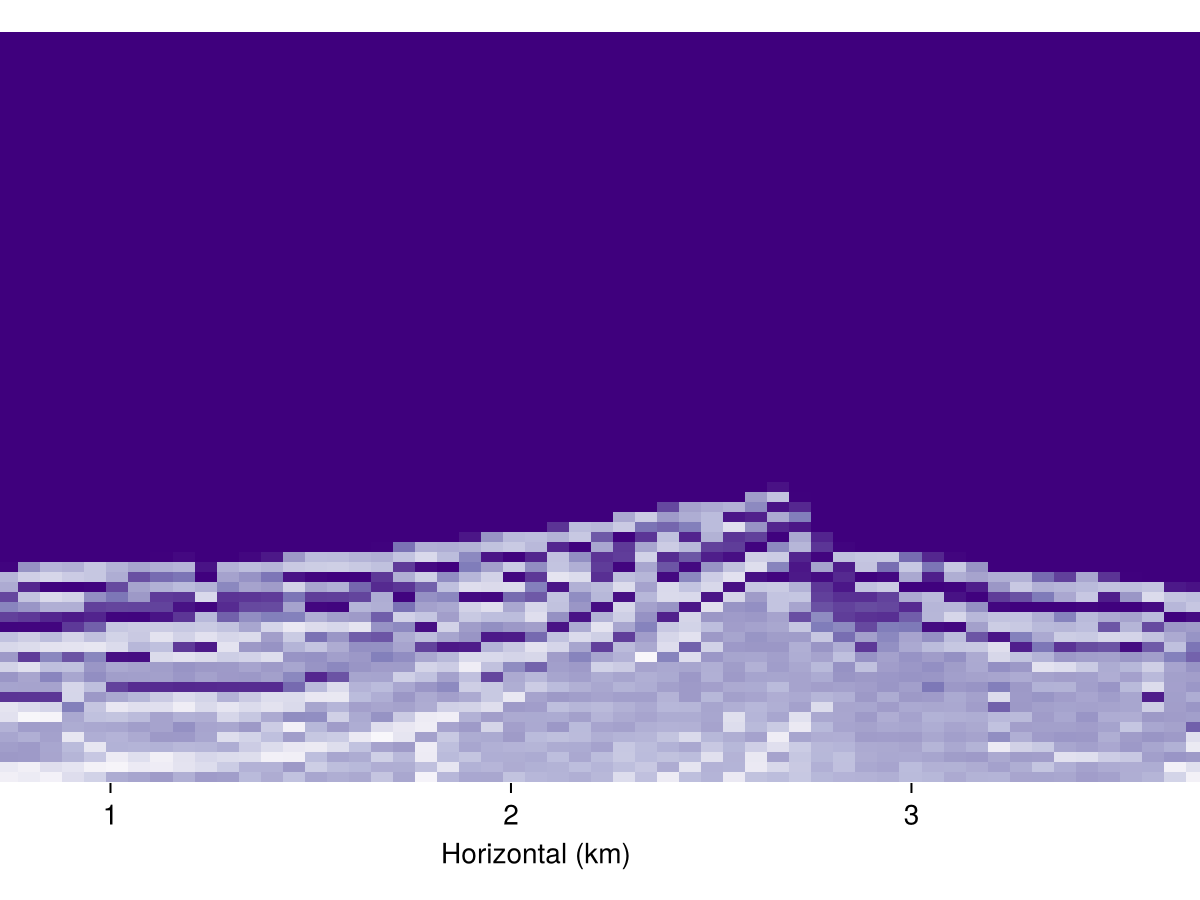

In [18]:
fig = Figure()
data = states[1][:Permeability]
@show size(data)
content_layout = GridLayout(fig[1,1])
plot_scalar_field(content_layout, Observable(data[1, :]); grid_2d, heatmap_kwargs=(; colormap=Reverse(:Purples)))
fig

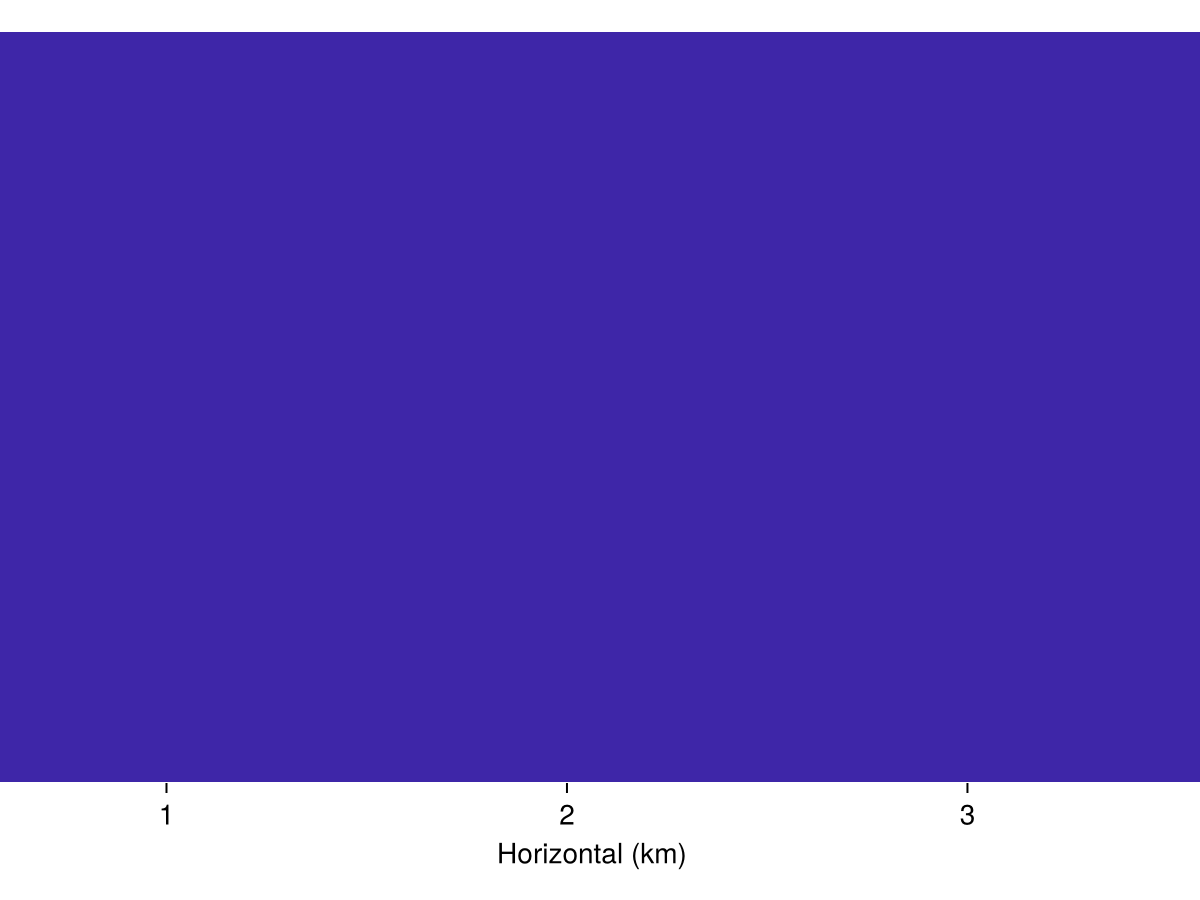

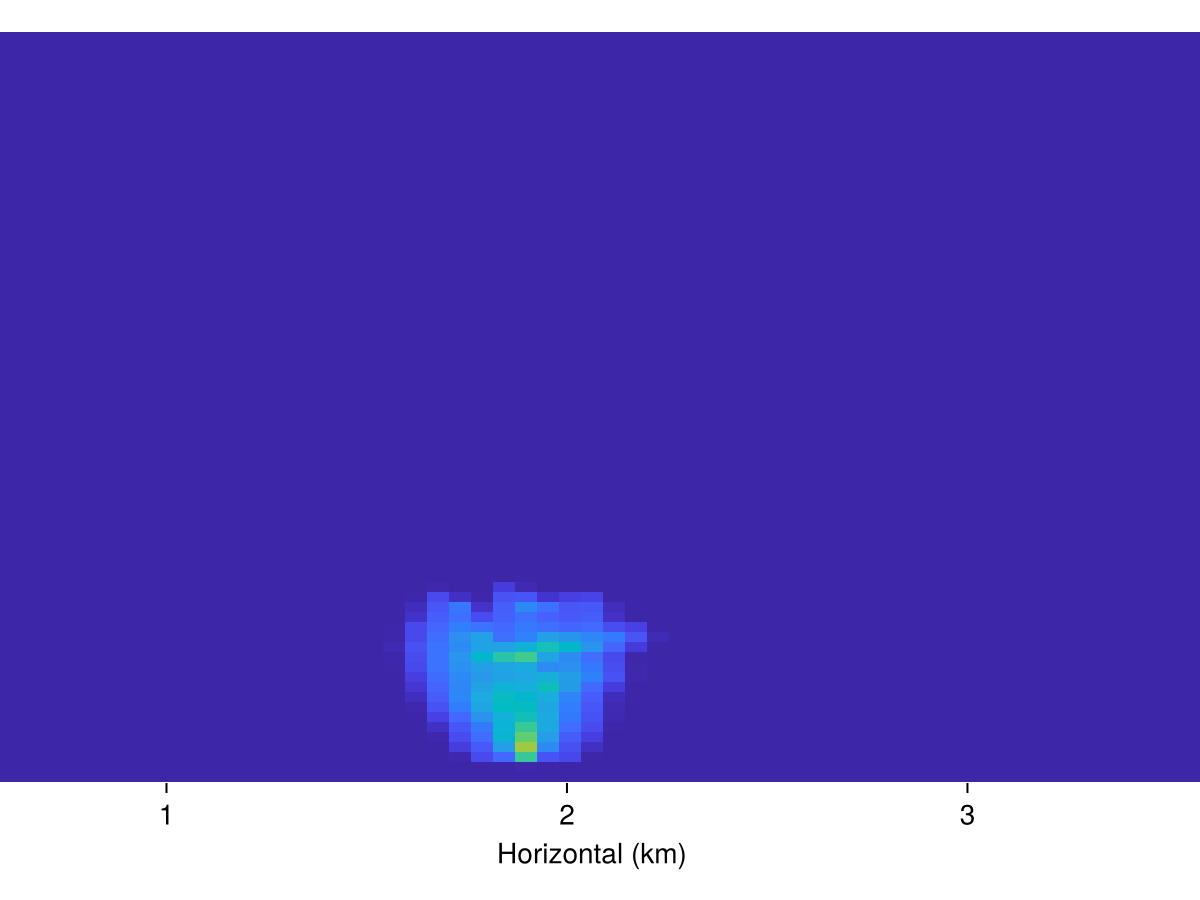

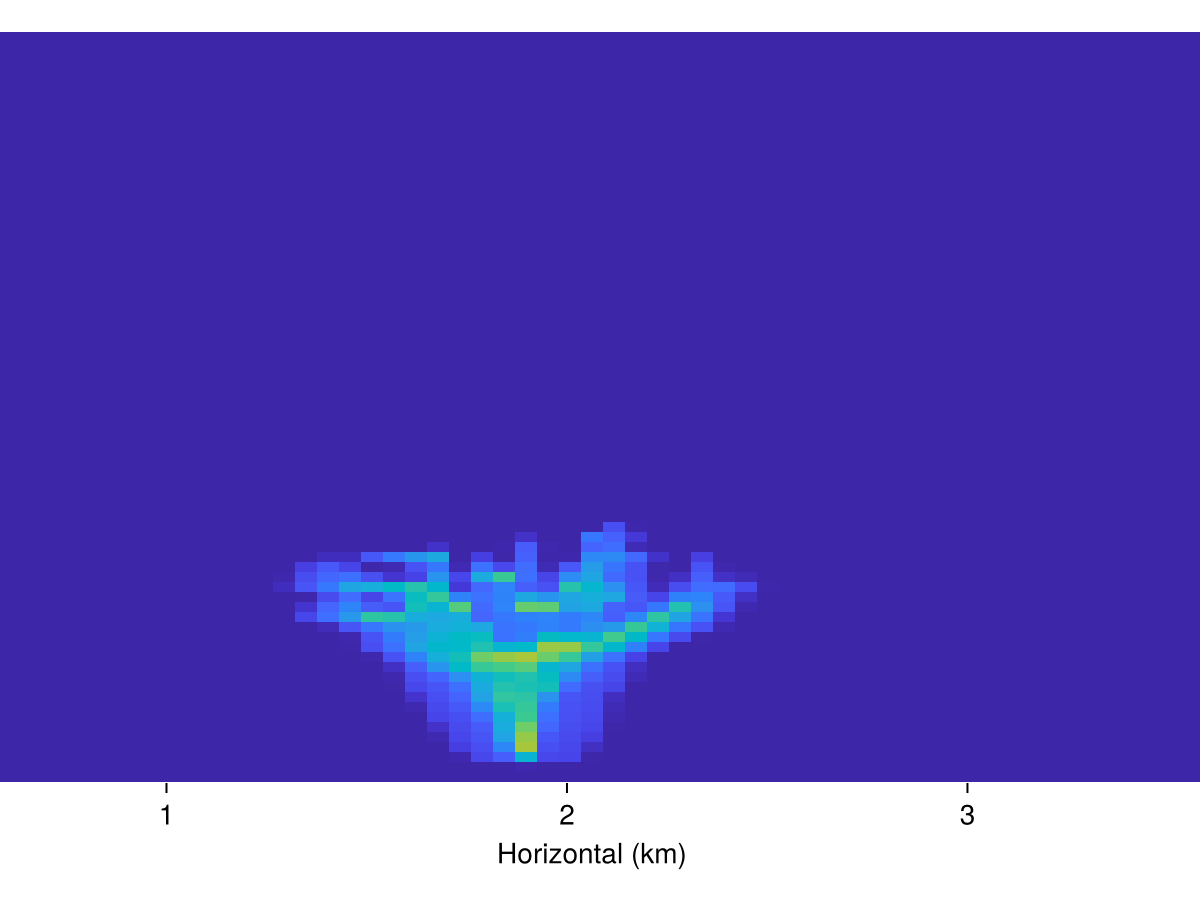

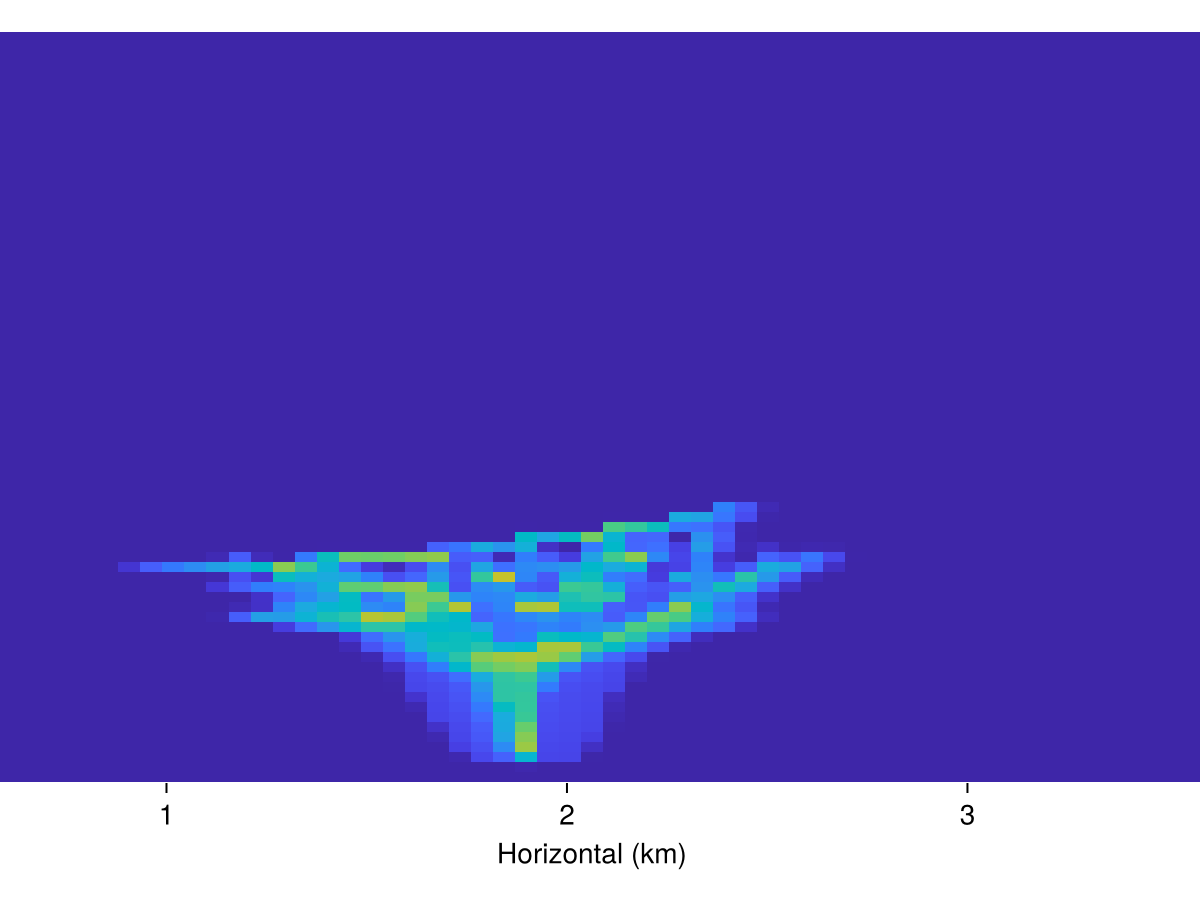

In [19]:
fig = Figure()
t_idx = Observable(1)
data = @lift(states[$t_idx][:Saturation])
content_layout = GridLayout(fig[1,1])
plot_scalar_field(content_layout, data; grid_2d, heatmap_kwargs=(; colorrange=(0,1), colormap=parula))
for i = 1:length(states)
    t_idx[] = i
    display(fig)
end

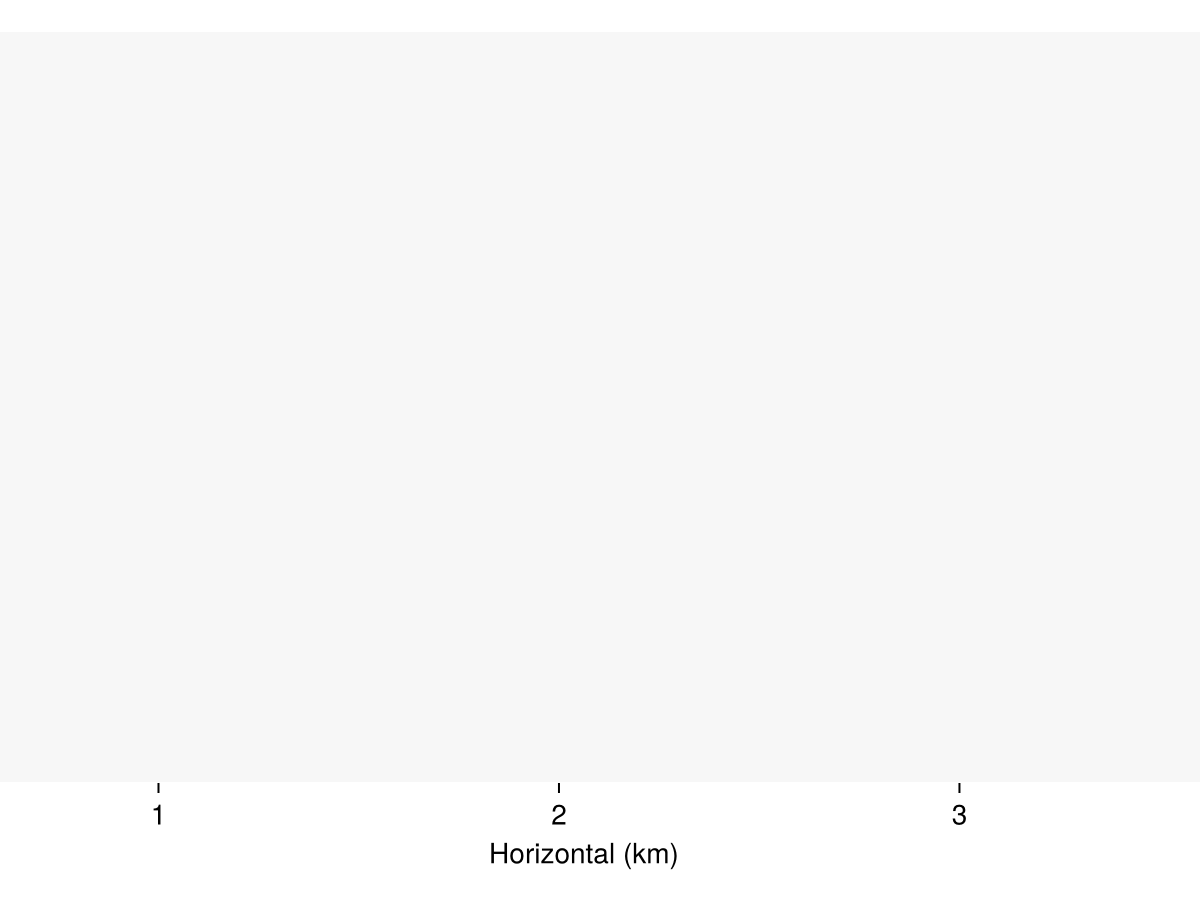

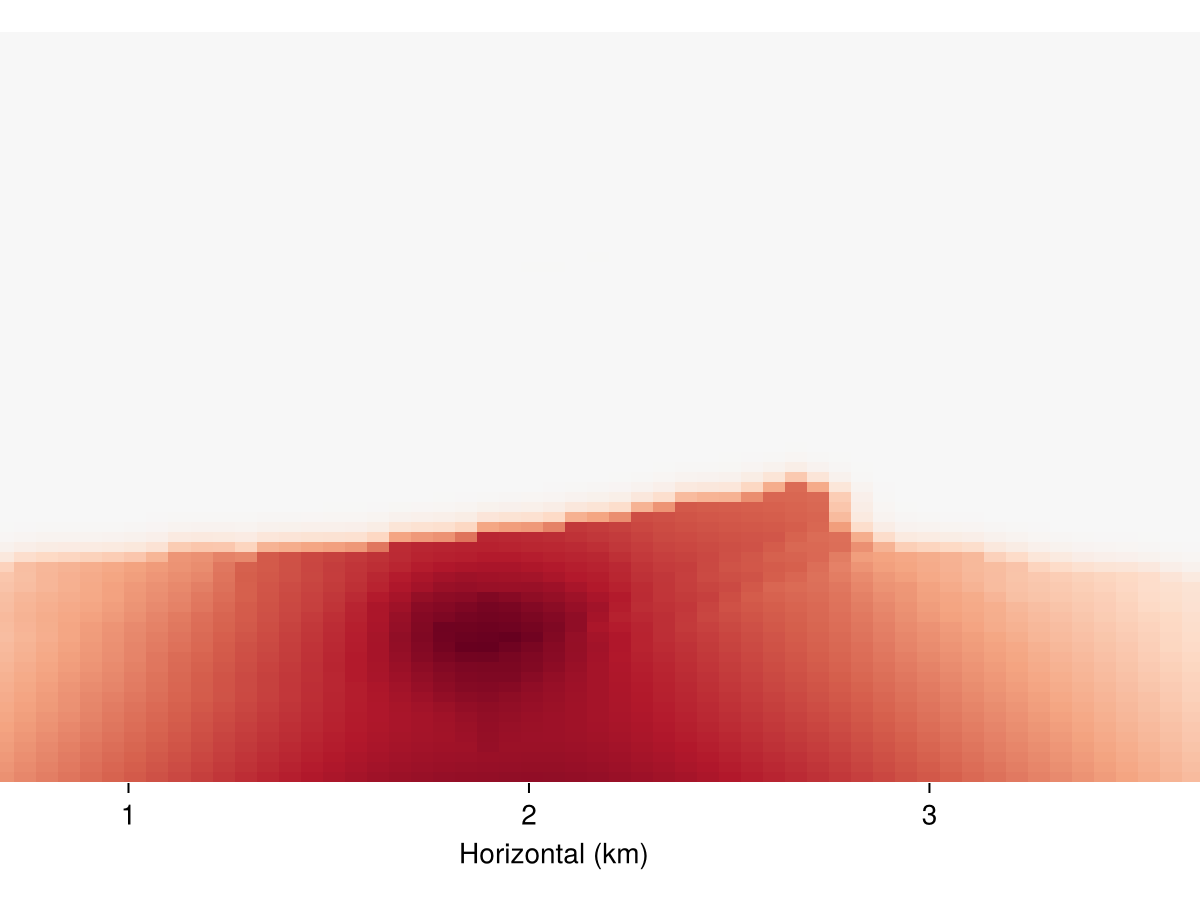

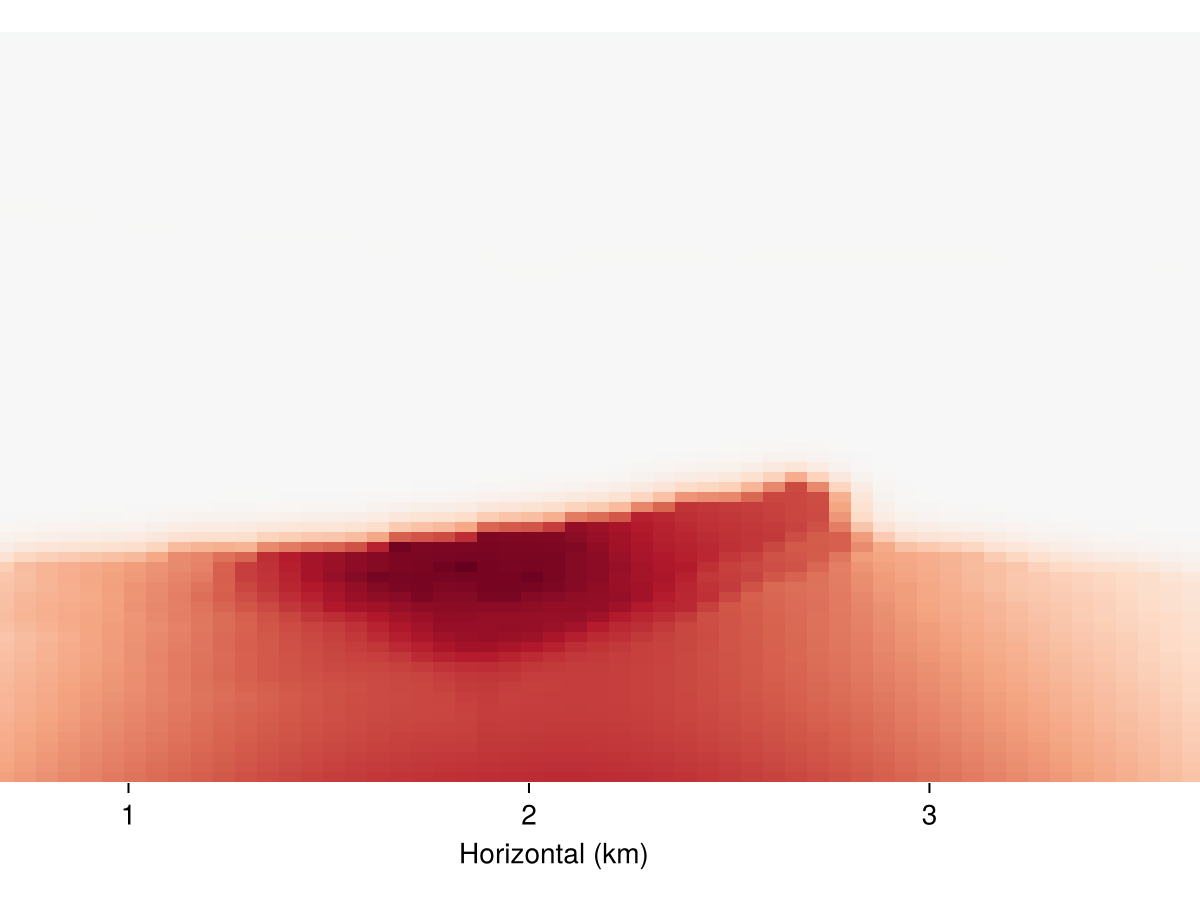

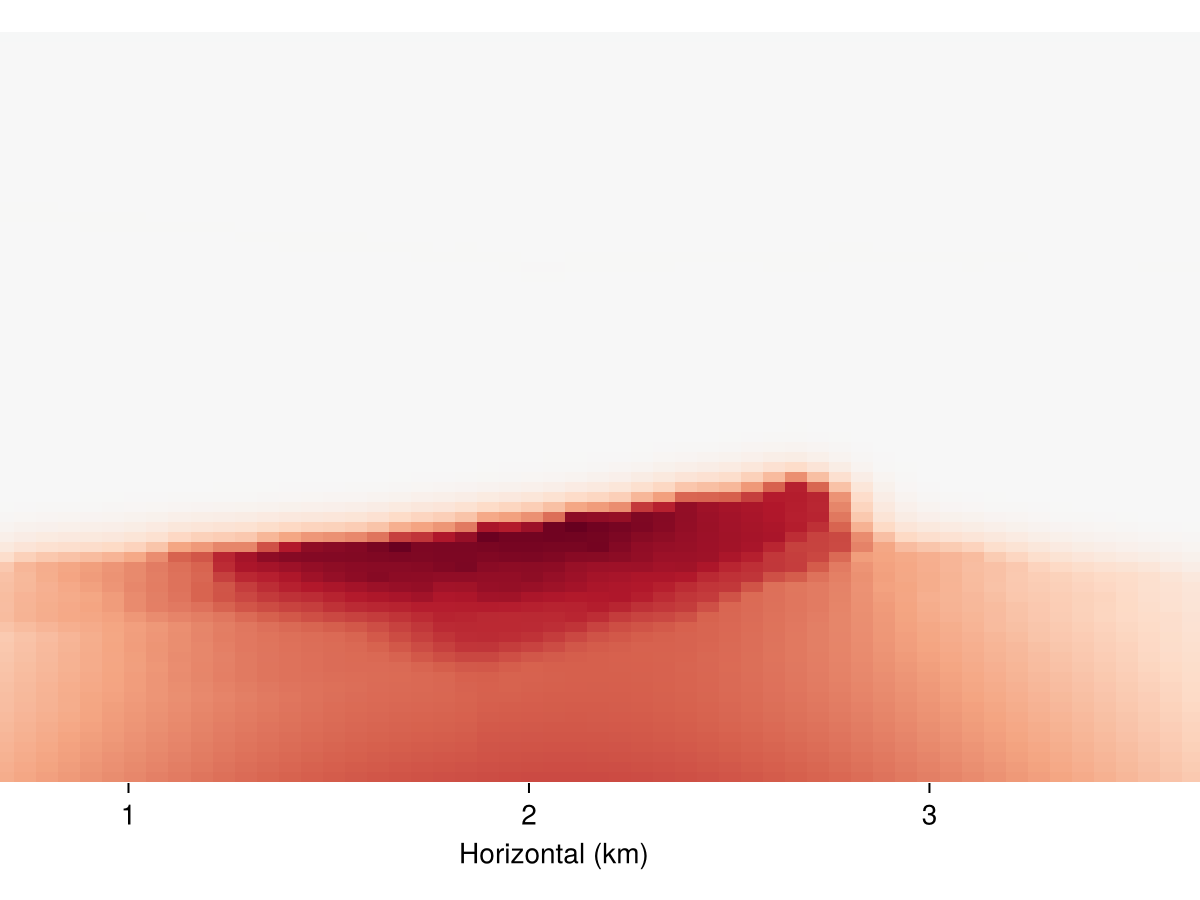

In [20]:
fig = Figure()
t_idx = Observable(1)
data = @lift(states[$t_idx][:Pressure] .- states[1][:Pressure])
content_layout = GridLayout(fig[1,1])
plot_scalar_field(content_layout, data; grid_2d, heatmap_kwargs=(; make_divergent=true, colormap=Reverse(:RdBu)))
for i = 1:length(states)
    t_idx[] = i
    display(fig)
end

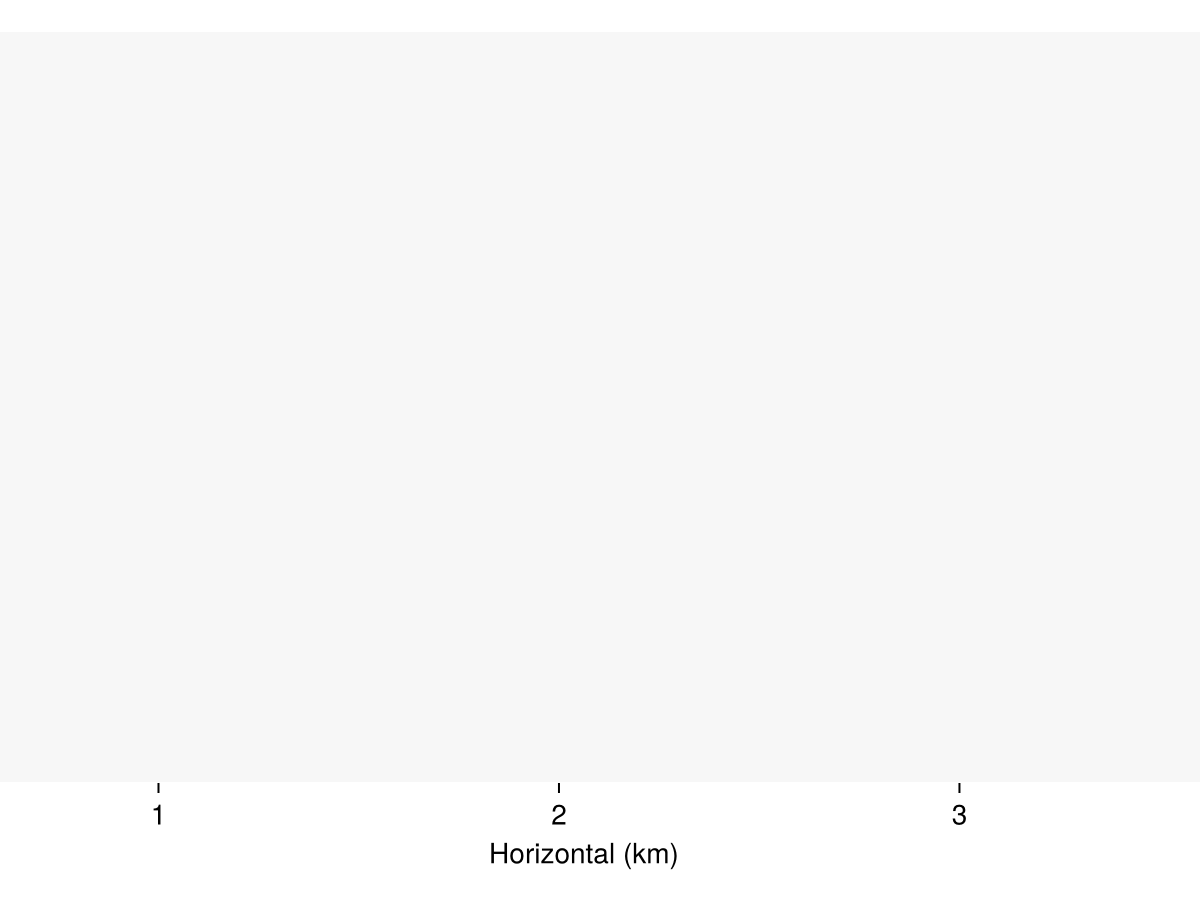

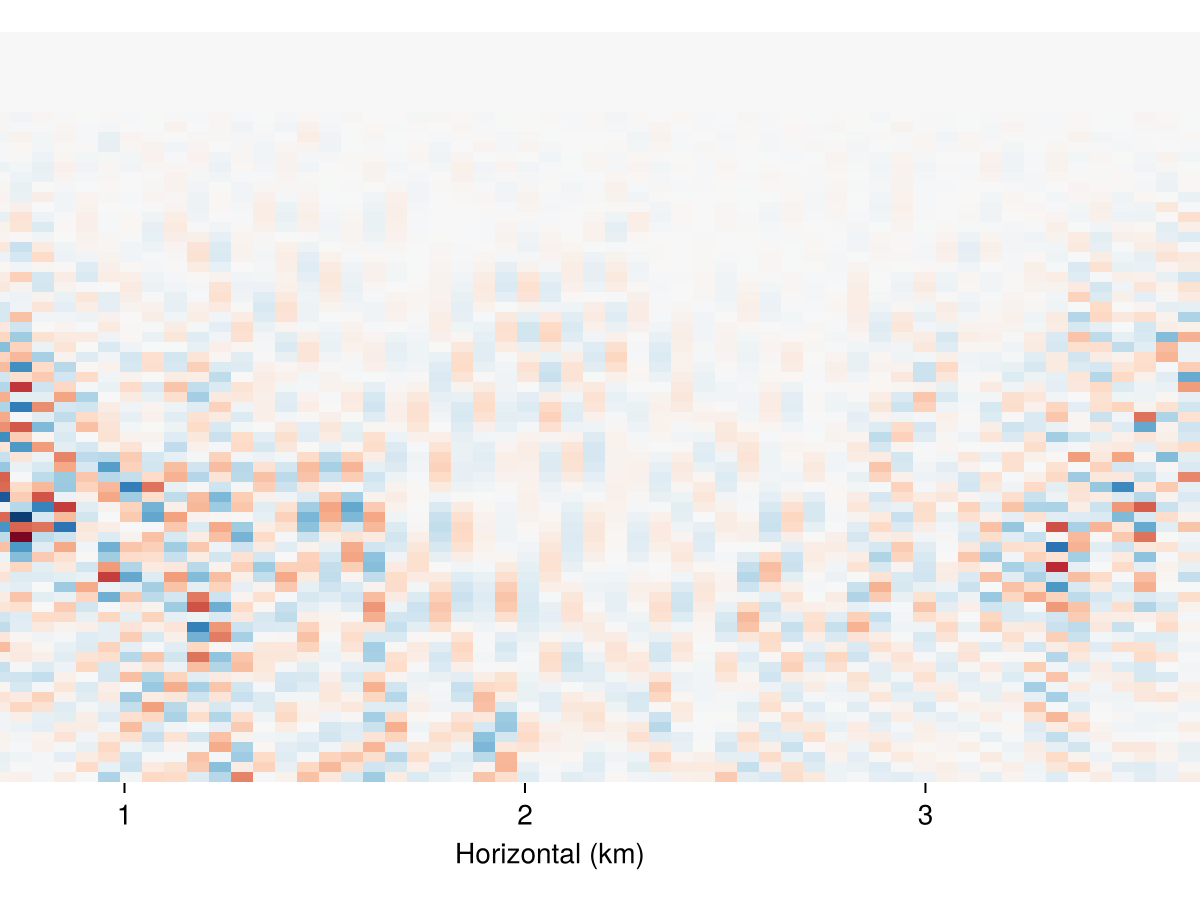

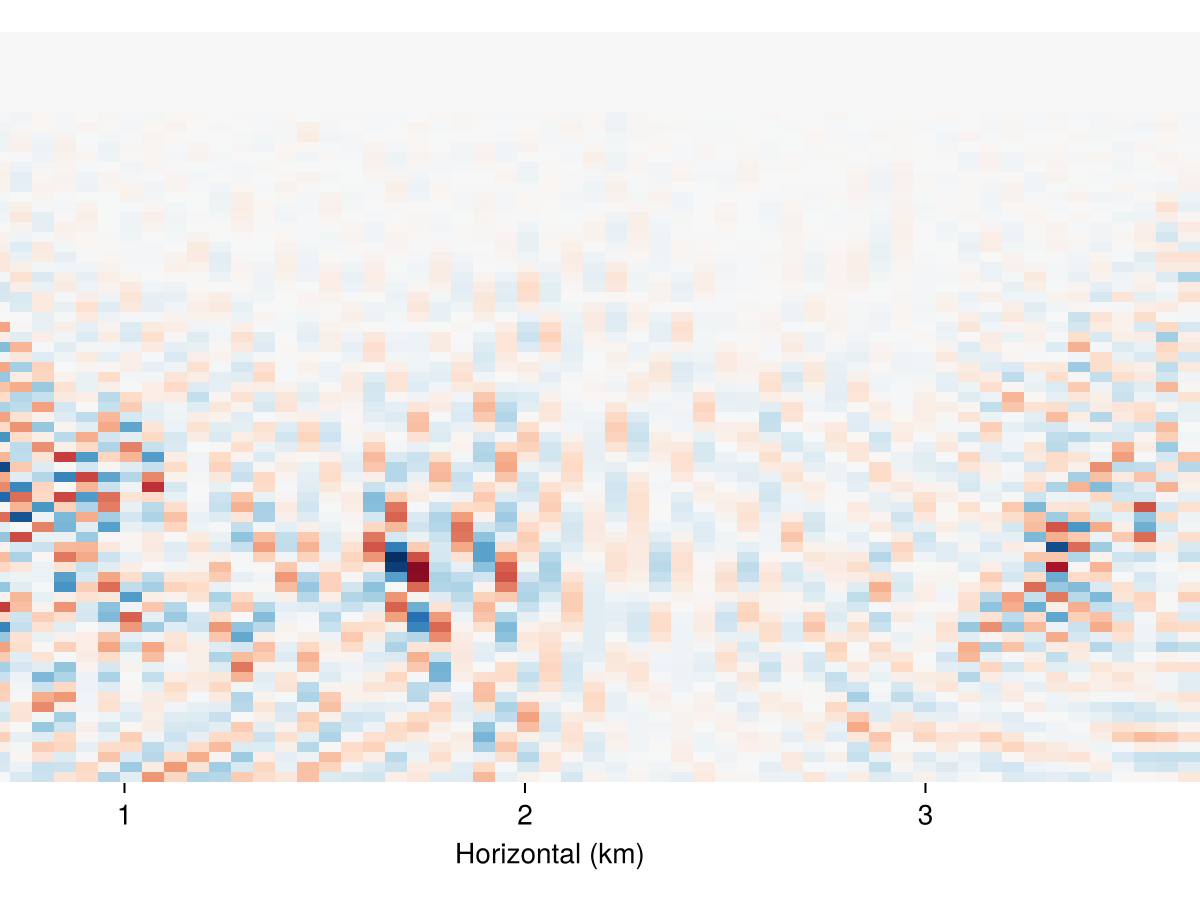

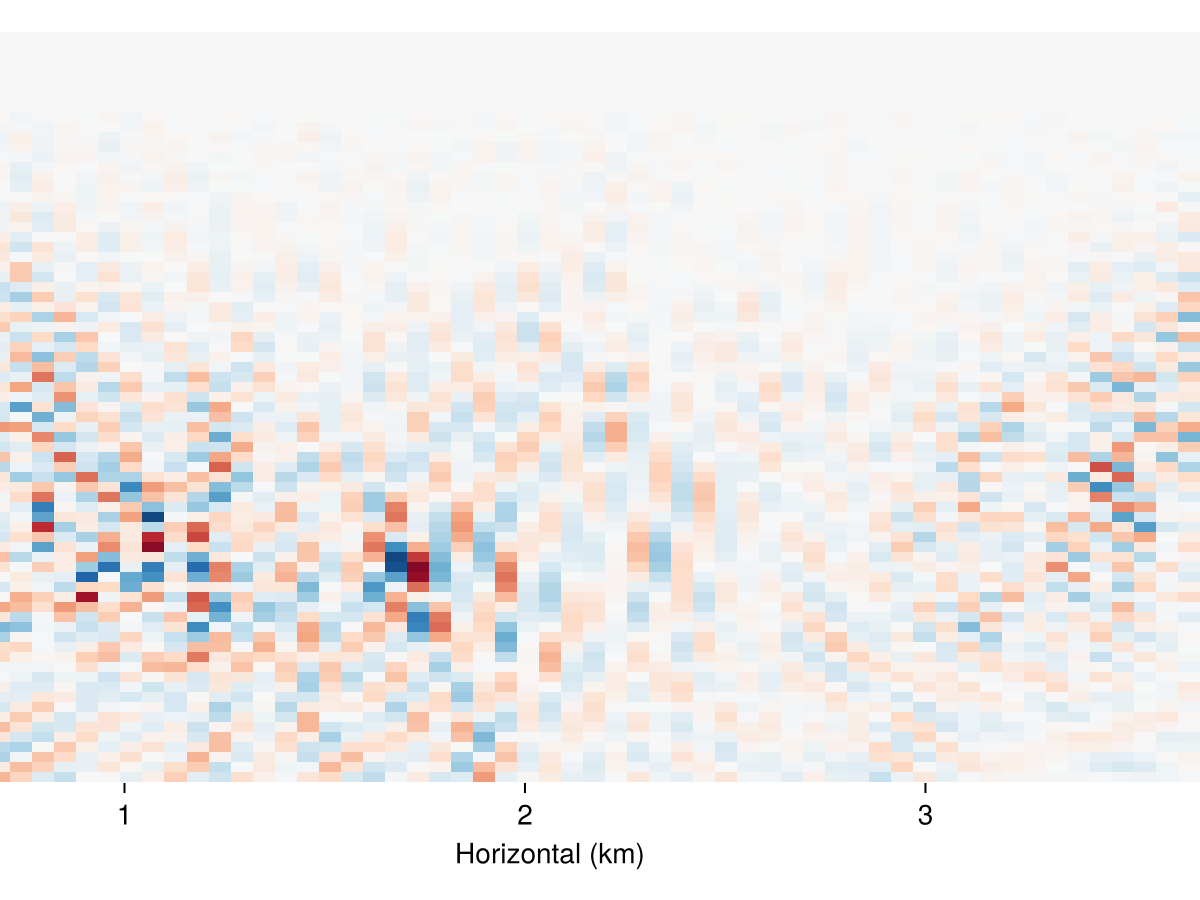

In [21]:
fig = Figure()
t_idx = Observable(1)
data = @lift(observations[$t_idx][:rtm] .- observations[1][:rtm])
content_layout = GridLayout(fig[1,1])
plot_scalar_field(content_layout, data; grid_2d, heatmap_kwargs=(; make_divergent=true, colormap=Reverse(:RdBu)))
for i = 1:length(observations)
    t_idx[] = i
    display(fig)
end

[ Info: Plotting source 1 at CartesianIndex(1, 1)
[ Info: Plotting source 2 at CartesianIndex(2, 1)


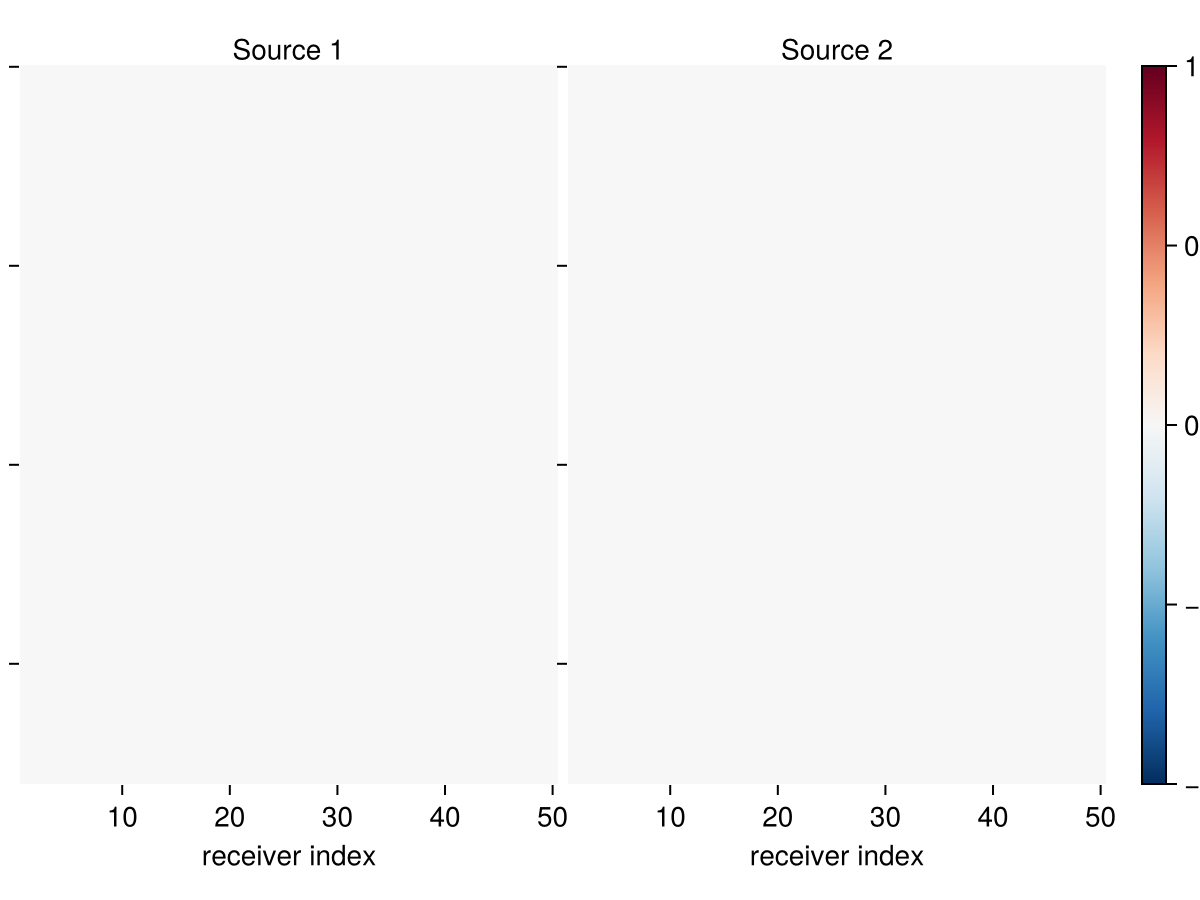

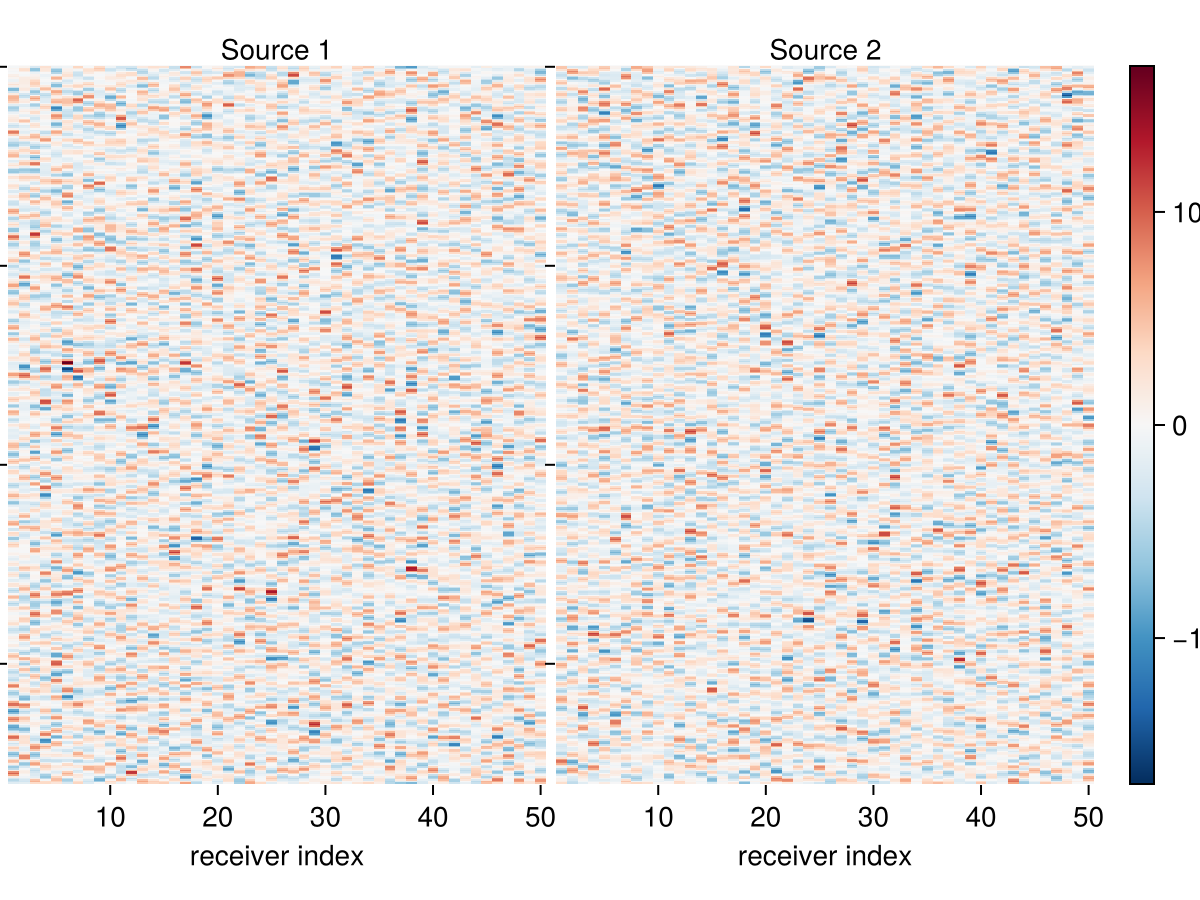

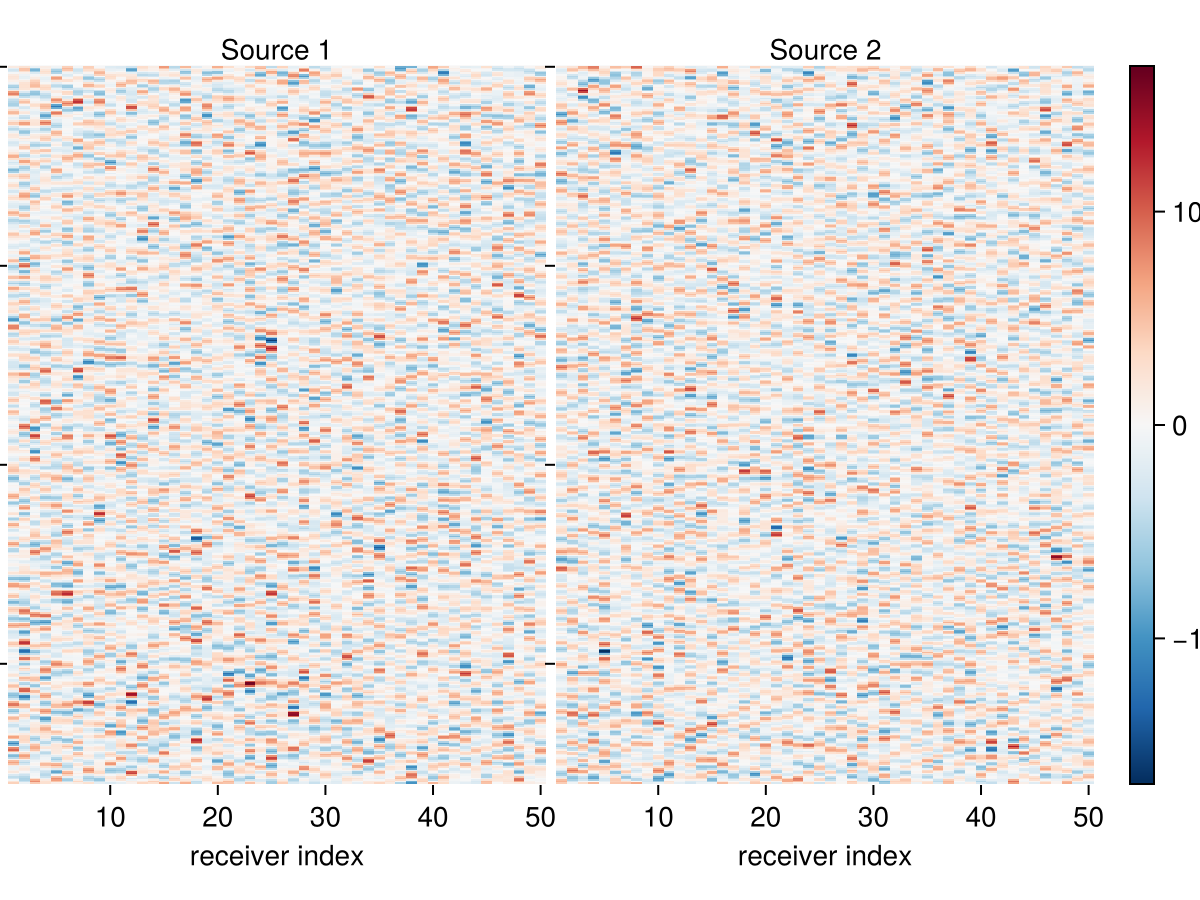

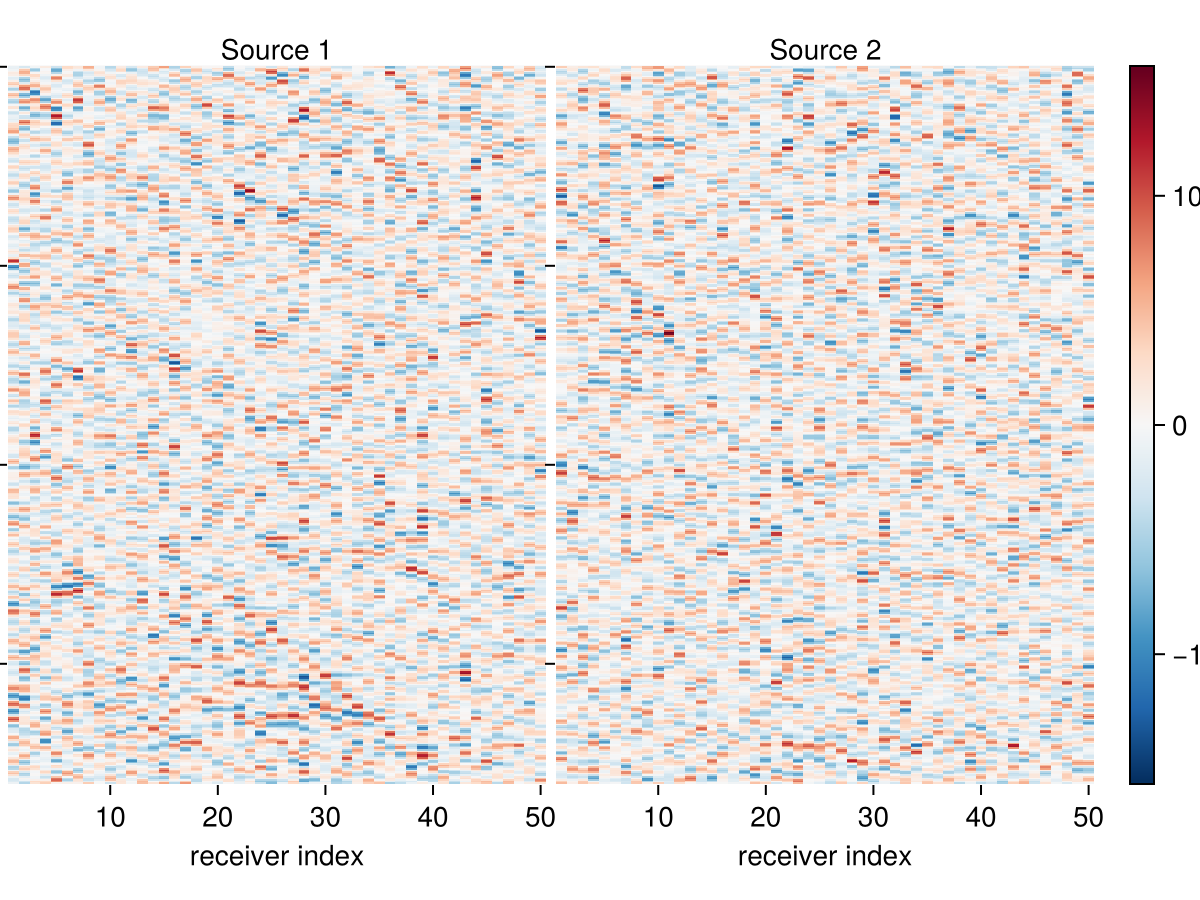

In [22]:
fig = Figure()
t_idx = Observable(1)
function dshot_diff(state)
    return [d .- d0 for (d0, d) in zip(observations[1][:dshot], state[:dshot])]
end
data = @lift(dshot_diff(observations[$t_idx]))
content_layout = GridLayout(fig[1,1])
timeR = @lift(params_gt.observation.observers[$t_idx].second.seismic.timeR)
dtR = @lift(params_gt.observation.observers[$t_idx].second.seismic.dtR)
nsrc = params_gt.observation.observers[1].second.seismic.source_receiver_geometry.nsrc
plot_data(content_layout, data, nothing, :dshot; heatmap_kwargs=(; make_divergent=true, colormap=Reverse(:RdBu)), nsrc, timeR, dtR)
for i = 1:length(observations)
    t_idx[] = i
    display(fig)
end

## Create initial ensemble.


In [23]:
filestem = "tutorial-initial-ensemble"

params_file = datadir("initial_ensemble", "params", "$filestem.jld2")
wsave(params_file; params=params.ensemble)

params_file = datadir("initial_ensemble", "params", "$filestem-human.yaml")
YAML.write_file(params_file, to_dict(params.ensemble, YAMLStyle))

println(YAML.write(to_dict(params.ensemble, YAMLStyle)))

version: "v0.1"
size: 2
seed: 9347215
mesh:
  n: (75, 1, 75)
  d: (55, 100.0, 25)
  origin: (0.0, 0.0, 0.0)
permeability_v_over_h: 0.36
prior: (Saturation = GaussianPriorOptions(0, 0), Permeability = FieldOptions(:field, FieldFileOptions("compass/broad&narrow_perm_models_new.jld2", nothing, "BroadK", 9.86923266716013e-16, true)))



In [24]:
savedir = datadir("initial_ensemble", "data")
data_initial, filepath = produce_or_load(
    generate_initial_ensemble,
    params.ensemble,
    savedir;
    filename=filestem,
    verbose=false,
    loadfile=true,
)
ensemble = data_initial["ensemble"];

┌ Warning: The Git repository
│ ('/home/gbruer/a/curr_research/ensembles/JutulJUDIFilter.jl/examples/filter-comparison')
│ is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /home/gbruer/.julia/packages/DrWatson/8XYbJ/src/saving_tools.jl:71


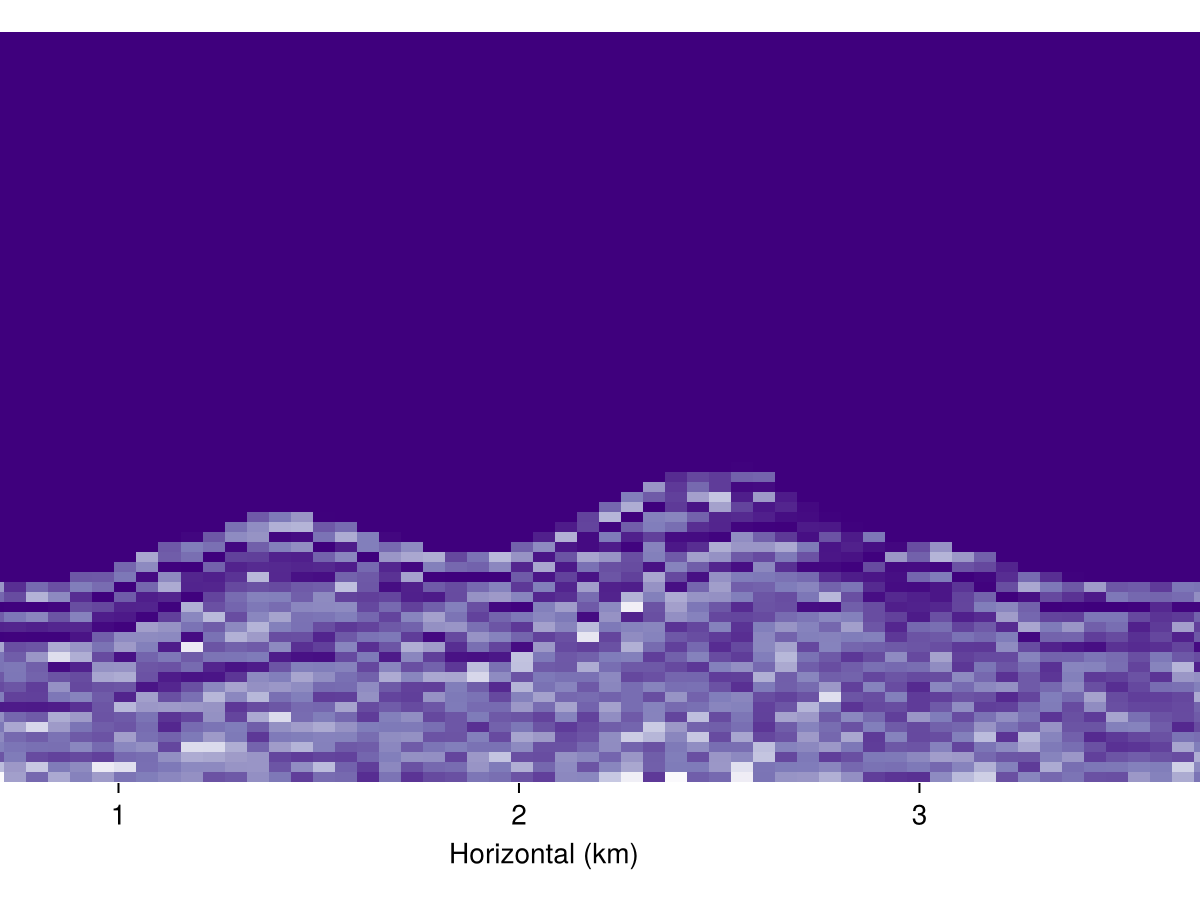

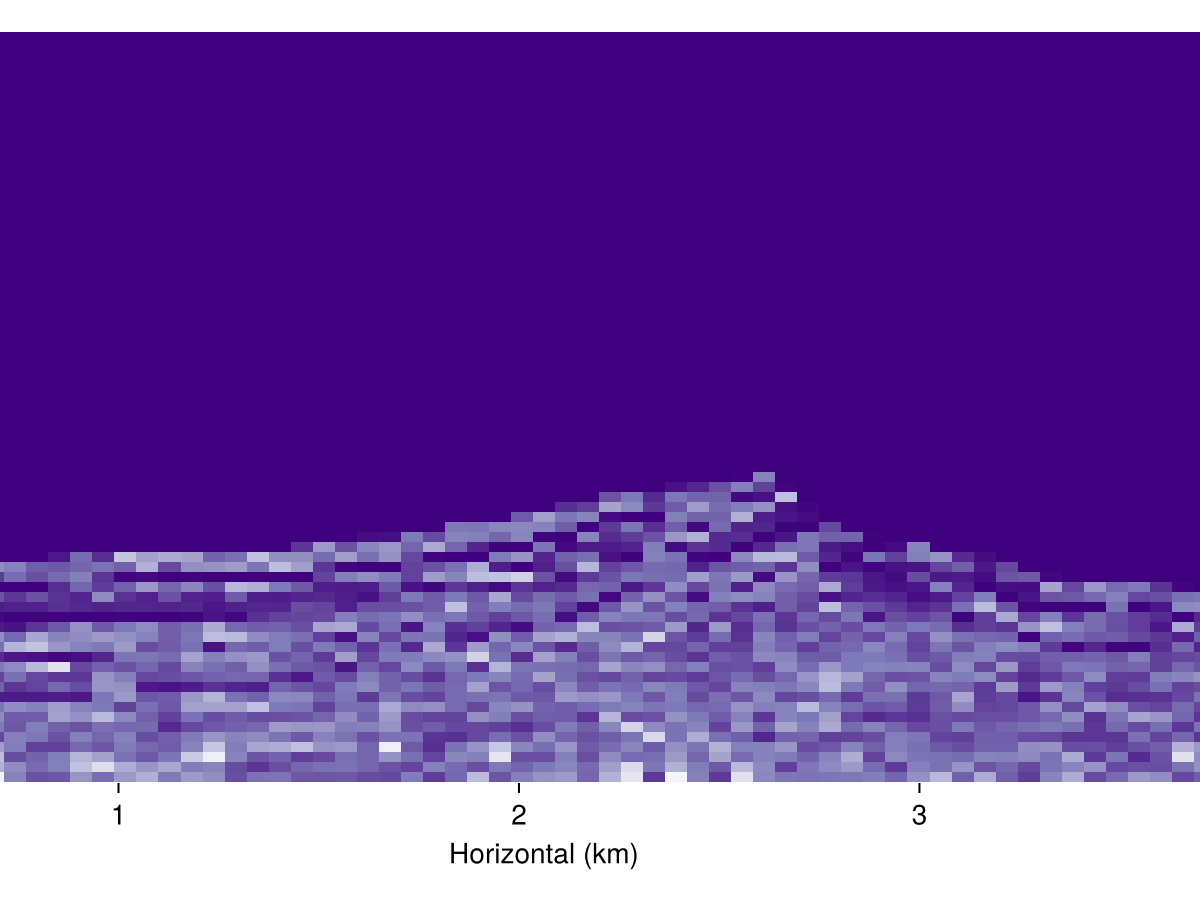

In [25]:
fig = Figure()
e_idx = Observable(1)
data = @lift(ensemble.members[$e_idx][:Permeability][1, :])
content_layout = GridLayout(fig[1,1])
plot_scalar_field(content_layout, data; grid_2d, heatmap_kwargs=(; colormap=Reverse(:Purples)))
for i = 1:min(length(ensemble.members), 3)
    e_idx[] = i
    display(fig)
end

## Run estimator


In [26]:
filestem = "tutorial-estimator"

params_file = datadir("estimator", "params", "$filestem.jld2")
wsave(params_file; params=params.estimator)

params_file = datadir("estimator", "params", "$filestem-human.yaml")
YAML.write_file(params_file, to_dict(params.ensemble, YAMLStyle))

println(YAML.write(to_dict(params.ensemble, YAMLStyle)))

version: "v0.1"
size: 2
seed: 9347215
mesh:
  n: (75, 1, 75)
  d: (55, 100.0, 25)
  origin: (0.0, 0.0, 0.0)
permeability_v_over_h: 0.36
prior: (Saturation = GaussianPriorOptions(0, 0), Permeability = FieldOptions(:field, FieldFileOptions("compass/broad&narrow_perm_models_new.jld2", nothing, "BroadK", 9.86923266716013e-16, true)))



In [28]:
savedir = datadir("estimator", "data")

states_gt = data_gt["states"]
observations_gt = data_gt["observations"]

ensemble = data_initial["ensemble"]

K = (Val(:Saturation), Val(:Pressure), Val(:Permeability))
JMT = JutulModelTranslator(K)

M = JutulModel(; translator=JMT, options=params.estimator.transition)
observers = get_multi_time_observer(params.estimator.observation)

# Initialize member for all primary variables in simulation.
@progress "Initialize ensemble states" for member in get_ensemble_members(ensemble)
    initialize_member!(M, member)
end

estimator = get_estimator(params.estimator.algorithm)

empty!(ensemble.state_keys)
append!(ensemble.state_keys, params.estimator.assimilation_state_keys)

t0 = 0.0
data = filter_loop(
    ensemble,
    t0,
    estimator,
    M,
    observers,
    observations_gt;
    name=get_short_name(params.estimator.algorithm),
    max_transition_step = params.estimator.max_transition_step,
    assimilation_obs_keys=params.estimator.assimilation_obs_keys,
)

Initialize ensemble states   0%|                        |  ETA: N/A
Initialize ensemble states  50%|████████████            |  ETA: 0:00:00
Initialize ensemble states 100%|████████████████████████| Time: 0:00:00
Initialize ensemble states 100%|████████████████████████| Time: 0:00:00
EnKF:   0%|                                             |  ETA: N/A


Noise norm: 1.0557323e11
SNR: 20.0


Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s


Noise norm: 1.0557324e11
SNR: 20.0


Operator `forward` ran in 0.07 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.10 s
Operator `gradient` ran in 0.12 s
Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.07 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
EnKF:   0%|                                             |  ETA: N/A


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │ 11 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     53.0 │      4.81818 │   53 (0) │
│ Linearization  │     64.0 │      5.81818 │   64 (0) │
│ Linear solver  │    143.0 │         13.0 │  143 (0) │
│ Precond apply  │    286.0 │         26.0 │  286 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬─────────┬────────────┬────────╮
│ Timing type   │    Each │   Relative │  Total │
│               │      ms │ Percentage │      s │
├───────────────┼─────────┼────────────┼────────┤
│ Properties    │  0.9122 │     4.00 % │ 0.0483 │
│ Equations     │  3.3574 │    17.76 % │ 0.2149 │
│ Assembly      │  0.9536 │     5.04 % │ 0.0610 │
│ Linear solve  │  1.4234 │     6.24 % │ 0.0754 │
│ Linear setup  │  9.7454 │    42.69 % │ 0.5165 │
│ Precond apply │  0.8199 │    19.38 % │ 0.234

Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s


Noise norm: 1.0559627e11
SNR: 20.0


Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `born` ran in 0.14 s
Operator `born` ran in 0.20 s
Operator `forward` ran in 0.11 s
Operator `gradient` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
EnKF:   0%|                                             |  ETA: N/A


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │ 10 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     46.0 │          4.6 │   46 (0) │
│ Linearization  │     56.0 │          5.6 │   56 (0) │
│ Linear solver  │    146.0 │         14.6 │  146 (0) │
│ Precond apply  │    292.0 │         29.2 │  292 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬─────────┬────────────┬──────────╮
│ Timing type   │    Each │   Relative │    Total │
│               │      ms │ Percentage │       ms │
├───────────────┼─────────┼────────────┼──────────┤
│ Properties    │  0.6040 │     3.88 % │  27.7857 │
│ Equations     │  2.1776 │    17.04 % │ 121.9473 │
│ Assembly      │  0.7242 │     5.67 % │  40.5527 │
│ Linear solve  │  1.1788 │     7.57 % │  54.2231 │
│ Linear setup  │  5.7219 │    36.77 % │ 263.2053 │
│ Precond apply │  0.5871 │ 

Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.07 s
Operator `gradient` ran in 0.11 s


Noise norm: 1.0557282e11
SNR: 20.0


Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.10 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
EnKF:   0%|                                             |  ETA: N/A


╭────────────────┬──────────┬──────────────┬──────────╮
│ Iteration type │ Avg/step │ Avg/ministep │    Total │
│                │  1 steps │ 10 ministeps │ (wasted) │
├────────────────┼──────────┼──────────────┼──────────┤
│ Newton         │     44.0 │          4.4 │   44 (0) │
│ Linearization  │     54.0 │          5.4 │   54 (0) │
│ Linear solver  │    146.0 │         14.6 │  146 (0) │
│ Precond apply  │    292.0 │         29.2 │  292 (0) │
╰────────────────┴──────────┴──────────────┴──────────╯
╭───────────────┬─────────┬────────────┬──────────╮
│ Timing type   │    Each │   Relative │    Total │
│               │      ms │ Percentage │       ms │
├───────────────┼─────────┼────────────┼──────────┤
│ Properties    │  0.6171 │     4.02 % │  27.1502 │
│ Equations     │  2.2128 │    17.68 % │ 119.4936 │
│ Assembly      │  0.7225 │     5.77 % │  39.0152 │
│ Linear solve  │  1.1732 │     7.64 % │  51.6194 │
│ Linear setup  │  5.4074 │    35.19 % │ 237.9240 │
│ Precond apply │  0.5667 │ 

Operator `born` ran in 0.15 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.10 s


Noise norm: 1.07016585e11
SNR: 20.0


Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.10 s
Operator `born` ran in 0.14 s
Operator `born` ran in 0.14 s
Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.08 s
Operator `gradient` ran in 0.11 s


106.585105 seconds (11.30 M allocations: 3.434 GiB, 42.21% gc time, 5.86% compilation time: <1% of which was recompilation)
  ^ timing for running filter loop (EnKF)


Operator `forward` ran in 0.09 s
Operator `gradient` ran in 0.11 s
Operator `forward` ran in 0.10 s
Operator `gradient` ran in 0.14 s
EnKF:   0%|                                             |  ETA: N/A
EnKF: 100%|█████████████████████████████████████████████| Time: 0:01:45


Dict{String, Any} with 11 entries:
  "observations_clean"      => Any[Ensemble(Dict{Symbol, Array}[Dict(:density=>…
  "observation_times"       => Any[0.0, 3.1557e7, 6.31139e7, 9.46709e7]
  "observation_clean_means" => Any[Dict{Symbol, Array}(:rtm=>Float32[0.0 0.0 … …
  "observation_means"       => Any[Dict{Symbol, Array}(:density=>Float32[1000.0…
  "states"                  => Any[Ensemble(Dict{Symbol, Any}[Dict(:Permeabilit…
  "logs"                    => Any[Dict{Symbol, Any}(:assimilate_data_linear_so…
  "t"                       => 9.46709e7
  "state_means"             => Any[Dict{Symbol, Any}(:Permeability=>[1.30921e-1…
  "observations"            => Any[Ensemble(Dict{Symbol, Array}[Dict(:dshot=>Ma…
  "state_times"             => Any[0.0, 0.0, 3.1557e7, 3.1557e7, 6.31139e7, 6.3…
  "ensemble"                => Ensemble(Dict{Symbol, Any}[Dict(:Permeability=>[…

In [29]:
using JLD2
data2 = Dict(Symbol(k) => v for (k,v) in data)
jldsave(joinpath(savedir, "tutorial-estimator.jld2"); data2...)

## Brief math review

There is an unknown state $x$. We know it changes over time according to a transition operator $\mathcal{M}$.

We can observe $x$ indirectly with an observation observation $y$ from observation model $\mathcal{H}$.

We have a transition operator $\mathcal{M}$ and an observation operator $\mathcal{H}$.


## Operators for geologic CO~2~ storage

### CO~2~ plume physics with Jutul

### Seismic wave physics with JUDI

## Set up synthetic system

### CO~2~ state evolution

```
## states = M()
## Plot states
```

### Seismic observations

Observe a few states.
```
## TODO
```

## Filtering

### Set up ensemble

### Predict without observations

### Assimilation observations

### Repeat

## Analyze results

### Error

### Uncertainty
